**PREDICCIÓN DEL ESTADIO EN PACIENTES DIAGNÓSTICADOS CON ENFERMEDAD RENAL CRÓNICA EN UN SUBSISTEMA DE SALUD EN COLOMBIA MEDIANTE ALGORITMOS DE APRENDIZAJE SUPERVISADO**

**MODELOS**

In [ ]:
import pandas as pd #Manipulacion data
import seaborn as sns # Graficas mejoradas
import datetime as dt #Fechas
import matplotlib.pyplot as plt #Graficas por defecto
import matplotlib.ticker as ticker # matplotly interactivo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/ERC 2023_FINAL.csv',sep=";",encoding='latin-1')

In [ ]:
num_registros_df = len(df)
num_registros_df

4968

In [ ]:
df = df.dropna(subset=['TASA_FILTRACION'])
#,'COLES','CREA ','ALB/CREA','TA'



In [ ]:
num_registros_df = len(df)
num_registros_df

3189

In [ ]:
print(df)

                      TIPO_REG    DAT_BARN  EDAD Sexo AFILIACION COD_EPS  \
0                          HTA  30/08/1949    74    M          P  RES003   
1                          HTA  21/09/1935    88    M          P  RES003   
2                     HTA-DIAB  20/12/1934    89    M          P  RES003   
3                          HTA  13/08/1936    87    M          P  RES003   
4                          HTA  20/05/1939    84    M          P  RES003   
...                        ...         ...   ...  ...        ...     ...   
4745                       HTA  30/11/1968    55    M          P  RES003   
4746                       HTA  30/01/1969    54    M          P  RES003   
4747  NO HTA/DIAB CON DAÑO REL  18/11/1961    62    M          P  RES003   
4748  NO HTA/DIAB CON DAÑO REL  24/07/1963    60    M          P  RES003   
4926                      DIAB  11/07/1997    26    M          P  RES003   

     COD_ETNICA               G_POB  MUN.        DATE_  ...  N_TRANS_REL  \
0       Nin

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Columns: 114 entries, TIPO_REG to DAT_CORTE
dtypes: float64(75), int64(11), object(28)
memory usage: 2.8+ MB


In [ ]:
# Subconjunto de variables para la ejecucion de los modelos
df2=df[['EDAD',
  'CREA ',
  'IMC',
  'ETIO_ERC',
  'Sexo',
  'G_POB',
  'COLES',
  'TA',
  'DX_ERC',
  'ALB/CREA',
  'TIEMP_SERVI',
  'PROG_ERC',
  'ANTAGONISTA',
  'RECIBIO_TRANS','TASA_FILTRACION']]
df2


,EDAD,CREA,IMC,ETIO_ERC,Sexo,G_POB,COLES,TA,DX_ERC,ALB/CREA,TIEMP_SERVI,PROG_ERC,ANTAGONISTA,RECIBIO_TRANS,TASA_FILTRACION
0,74,0.74,27,Otras,M,Adulto Mayor,181.0,120.0,1,9.00,12,2.0,2.0,5,82.00
1,88,NaN,26,Otras,M,Adulto Mayor,NaN,130.0,1,9.00,12,2.0,2.0,5,43.00
2,89,1.38,28,Otras,M,Adulto Mayor,187.0,110.0,1,9.00,10,2.0,2.0,5,34.00
3,87,0.86,24,Otras,M,Adulto Mayor,153.0,100.0,1,9.00,12,2.0,2.0,5,47.00
4,84,1.44,26,Otras,M,Adulto Mayor,276.0,160.0,1,9.00,8,2.0,1.0,5,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,55,1.46,32,NaN,M,Trabajador Urbano,179.0,122.0,1,3.93,12,1.0,2.0,5,74.85
4746,54,1.78,24,NaN,M,Otro,108.0,110.0,1,57.93,12,1.0,1.0,5,52.34
4747,62,1.57,28,Otras,M,Otro,NaN,105.0,1,429.70,12,1.0,1.0,5,52.97
4748,60,1.32,25,NaN,M,Otro,219.0,110.0,1,1.30,12,1.0,2.0,5,63.92


In [ ]:
missing_values_count = df2.isnull().mean()* 100

missing_values_count[0:30]

EDAD                0.000000
CREA                4.829100
IMC                 0.000000
ETIO_ERC           27.626215
Sexo                0.000000
G_POB               0.000000
COLES              14.048291
TA                  0.595798
DX_ERC              0.000000
ALB/CREA            0.501725
TIEMP_SERVI         0.000000
PROG_ERC            0.972092
ANTAGONISTA         1.411101
RECIBIO_TRANS       0.000000
TASA_FILTRACION     0.000000
dtype: float64

In [ ]:
#Creación de la variable "TASAFILTRACION", para poder clasificar los estadios de acuerdo a los rangos definidos
import pandas as pd

def crear_columna_estadio(df):
    """
    Crea una columna llamada "estadio" con los valores de la variable "TASAFILTRACION" clasificados en cuatro categorías.

    Args:
      df: Un DataFrame de pandas.

    Returns:
      El DataFrame original con una nueva columna llamada "estadio".
    """
    # Crear una función para asignar una categoría a cada valor de TASAFILTRACION
    def clasificar_estadio(TASA_FILTRACION):
        if TASA_FILTRACION >= 90:
            return "estadio 1"
        elif TASA_FILTRACION >= 60:
            return "estadio 2"
        elif TASA_FILTRACION >= 30:
            return "estadio 3"
        elif TASA_FILTRACION >= 15:
            return "estadio 4"
        else:
            return "estadio 5"

    # Agregar la columna
    df["estadio"] = df["TASA_FILTRACION"].apply(clasificar_estadio)

    return df



In [ ]:
# Ahora, 'data' contendrá la columna adicional 'estadio' con los valores clasificados en cuatro categorías.
data = crear_columna_estadio(df2)



<ipython-input-160-df86f8389c9e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["estadio"] = df["TASA_FILTRACION"].apply(clasificar_estadio)


In [ ]:
#Visualización de la estrcutura de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Columns: 114 entries, TIPO_REG to DAT_CORTE
dtypes: float64(75), int64(11), object(28)
memory usage: 2.8+ MB


In [ ]:
# Se eliminan las variable COST_HTA,TALLA y COST_TOTAL
df2=df2[['EDAD',
  'CREA ',
  'IMC',
  'ETIO_ERC',
  'Sexo',
  'G_POB',
  'COLES',
  'TA',
  'DX_ERC',
  'ALB/CREA',
  'TIEMP_SERVI',
  'PROG_ERC',
  'ANTAGONISTA',
  'RECIBIO_TRANS','estadio']]
df2

,EDAD,CREA,IMC,ETIO_ERC,Sexo,G_POB,COLES,TA,DX_ERC,ALB/CREA,TIEMP_SERVI,PROG_ERC,ANTAGONISTA,RECIBIO_TRANS,estadio
0,74,0.74,27,Otras,M,Adulto Mayor,181.0,120.0,1,9.00,12,2.0,2.0,5,estadio 2
1,88,NaN,26,Otras,M,Adulto Mayor,NaN,130.0,1,9.00,12,2.0,2.0,5,estadio 3
2,89,1.38,28,Otras,M,Adulto Mayor,187.0,110.0,1,9.00,10,2.0,2.0,5,estadio 3
3,87,0.86,24,Otras,M,Adulto Mayor,153.0,100.0,1,9.00,12,2.0,2.0,5,estadio 3
4,84,1.44,26,Otras,M,Adulto Mayor,276.0,160.0,1,9.00,8,2.0,1.0,5,estadio 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,55,1.46,32,NaN,M,Trabajador Urbano,179.0,122.0,1,3.93,12,1.0,2.0,5,estadio 2
4746,54,1.78,24,NaN,M,Otro,108.0,110.0,1,57.93,12,1.0,1.0,5,estadio 3
4747,62,1.57,28,Otras,M,Otro,NaN,105.0,1,429.70,12,1.0,1.0,5,estadio 3
4748,60,1.32,25,NaN,M,Otro,219.0,110.0,1,1.30,12,1.0,2.0,5,estadio 2


In [ ]:
#Estructura dataframe nuevo
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAD           3189 non-null   int64  
 1   CREA           3035 non-null   float64
 2   IMC            3189 non-null   int64  
 3   ETIO_ERC       2308 non-null   object 
 4   Sexo           3189 non-null   object 
 5   G_POB          3189 non-null   object 
 6   COLES          2741 non-null   float64
 7   TA             3170 non-null   float64
 8   DX_ERC         3189 non-null   int64  
 9   ALB/CREA       3173 non-null   float64
 10  TIEMP_SERVI    3189 non-null   int64  
 11  PROG_ERC       3158 non-null   float64
 12  ANTAGONISTA    3144 non-null   float64
 13  RECIBIO_TRANS  3189 non-null   int64  
 14  estadio        3189 non-null   object 
dtypes: float64(6), int64(5), object(4)
memory usage: 398.6+ KB


In [ ]:
df2.fillna(0, inplace=True)

<ipython-input-166-32f74130add2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(0, inplace=True)


In [ ]:
#Se crea X contiene todas las columnas de df2 excepto la columna 'estadio', la cual es la variable objetivo. y contiene solo la columna 'estadio'.
X = df2.drop('estadio', axis=1).values
y = df2['estadio'].values

In [ ]:
# Se divide el Dataframe en datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('x_train and x_test shapes are {} and {}'.format(X_train.shape, X_test.shape))
print('y_train and y_test shapes are {} and {}'.format(y_train.shape, y_test.shape))

x_train and x_test shapes are (2232, 14) and (957, 14)
y_train and y_test shapes are (2232,) and (957,)


In [ ]:
df2['estadio']

0       1
1       2
2       2
3       2
4       2
       ..
4745    1
4746    2
4747    2
4748    1
4926    0
Name: estadio, Length: 3189, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAD           3189 non-null   int64  
 1   CREA           3189 non-null   float64
 2   IMC            3189 non-null   int64  
 3   ETIO_ERC       3189 non-null   int64  
 4   Sexo           3189 non-null   int64  
 5   G_POB          3189 non-null   int64  
 6   COLES          3189 non-null   float64
 7   TA             3189 non-null   float64
 8   DX_ERC         3189 non-null   int64  
 9   ALB/CREA       3189 non-null   float64
 10  TIEMP_SERVI    3189 non-null   int64  
 11  PROG_ERC       3189 non-null   int64  
 12  ANTAGONISTA    3189 non-null   int64  
 13  RECIBIO_TRANS  3189 non-null   int64  
 14  estadio        3189 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 398.6 KB


**Regresion logistica multinomial**

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define el modelo de regresión logística multinomial
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Define el procedimiento de evaluación del modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evalúa el modelo y recopila los puntajes
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Reporta el rendimiento del modelo
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))






Mean Accuracy: 0.612 (0.021)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Precisión del Modelo: 0.610
Reporte de Clasificación:
              precision    recall  f1-score   support

   estadio 1       0.66      0.65      0.65       240
   estadio 2       0.59      0.61      0.60       401
   estadio 3       0.60      0.67      0.63       278
   estadio 4       0.00      0.00      0.00        36
   estadio 5       0.00      0.00      0.00         2

    accuracy                           0.61       957
   macro avg       0.37      0.38      0.38       957
weighted avg       0.59      0.61      0.60       957



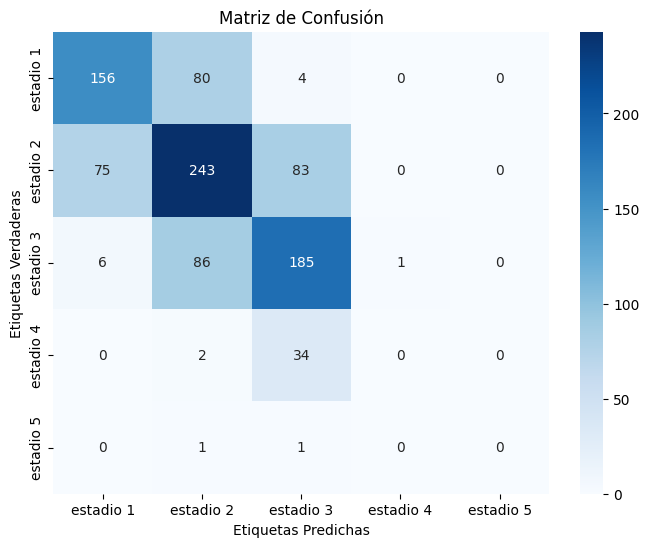

variance del Modelo: 0.438871473354232
sesgo del Modelo: -0.04597701149425287


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Ajustar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Modelo: {accuracy:.3f}')

# Definir un mapeo de renombre de clases
class_mapping = {
    0: 'estadio 1',
    1: 'estadio 2',
    2: 'estadio 3',
    3: 'estadio 4',
    4: 'estadio 5'
}

# Aplicar el renombre de clases a las etiquetas reales y predichas
y_test_mapped = [class_mapping[cl] for cl in y_test]
y_pred_mapped = [class_mapping[cl] for cl in y_pred]

# Mostrar el reporte de clasificación con las clases renombradas
print('Reporte de Clasificación:')
print(classification_report(y_test_mapped, y_pred_mapped))

# Calcular y mostrar la matriz de confusión con nombres de estadio
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()
import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# Initiate model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Cross validation
rf_cv_results_train = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest (Train): ", np.mean(rf_cv_results_train))

rf_cv_results_test = cross_val_score(rf, X_test, y_test, cv=5)
print("Random Forest (Test): ", np.mean(rf_cv_results_test))

Random Forest (Train):  0.747294870637333


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Random Forest (Test):  0.7461496509598604


Reporte de Clasificación:
              precision    recall  f1-score   support

   estadio 1       0.79      0.80      0.79       240
   estadio 2       0.75      0.76      0.75       401
   estadio 3       0.75      0.78      0.76       278
   estadio 4       0.80      0.33      0.47        36
   estadio 5       1.00      1.00      1.00         2

    accuracy                           0.76       957
   macro avg       0.82      0.73      0.76       957
weighted avg       0.76      0.76      0.76       957



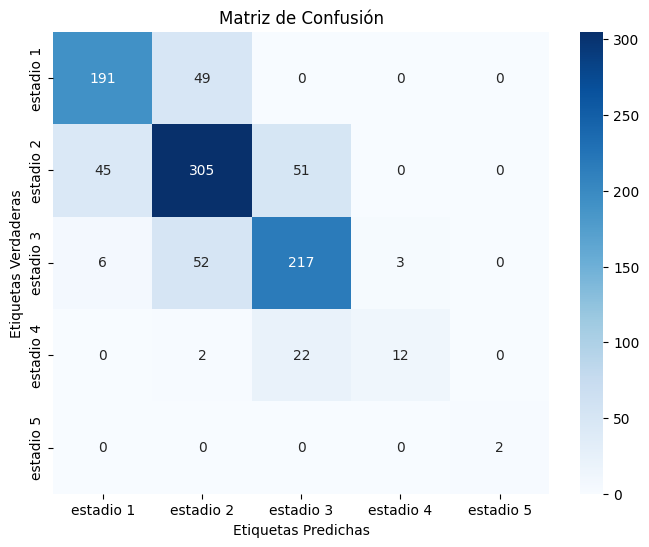

variance del Modelo: 0.26541274817136884
sesgo del Modelo: -0.03343782654127482


In [ ]:
# Obtener predicciones para el conjunto de prueba
y_pred = rf.predict(X_test)

# Definir un mapeo de renombre de clases
class_mapping = {
    0: 'estadio 1',
    1: 'estadio 2',
    2: 'estadio 3',
    3: 'estadio 4',
    4: 'estadio 5'
}

# Aplicar el renombre de clases a las etiquetas reales y predichas
y_test_mapped = [class_mapping[cl] for cl in y_test]
y_pred_mapped = [class_mapping[cl] for cl in y_pred]

# Mostrar el reporte de clasificación con las clases renombradas
print('Reporte de Clasificación:')
print(classification_report(y_test_mapped, y_pred_mapped))

# Calcular y mostrar la matriz de confusión con nombres de estadio
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()
import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)

**XGBoost clasifier**

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.06%


Precisión del Modelo: 78.06%
Reporte de Clasificación:
              precision    recall  f1-score   support

   estadio 1       0.81      0.80      0.80       240
   estadio 2       0.78      0.77      0.77       401
   estadio 3       0.76      0.81      0.78       278
   estadio 4       0.79      0.53      0.63        36
   estadio 5       1.00      1.00      1.00         2

    accuracy                           0.78       957
   macro avg       0.83      0.78      0.80       957
weighted avg       0.78      0.78      0.78       957



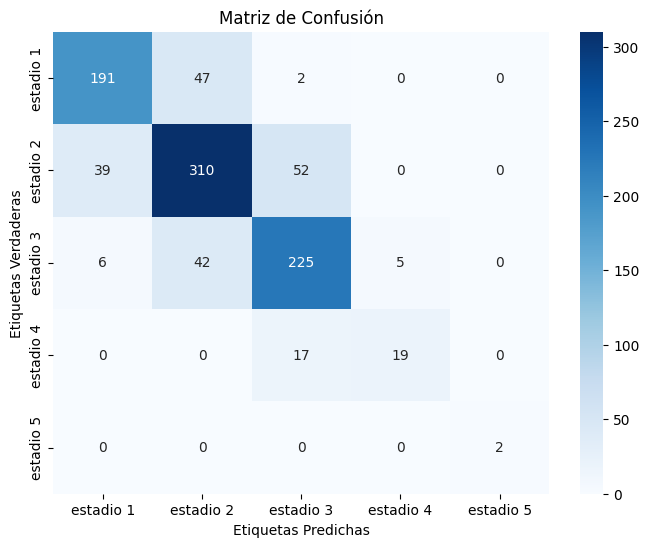

variance del Modelo: 0.2445141065830721
sesgo del Modelo: -0.0020898641588296763


In [ ]:
# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del Modelo: %.2f%%" % (accuracy * 100.0))

# Definir un mapeo de renombre de clases
class_mapping = {
    0: 'estadio 1',
    1: 'estadio 2',
    2: 'estadio 3',
    3: 'estadio 4',
    4: 'estadio 5'
}

# Aplicar el renombre de clases a las etiquetas reales y predichas
y_test_mapped = [class_mapping[cl] for cl in y_test]
y_pred_mapped = [class_mapping[cl] for cl in y_pred]

# Mostrar el reporte de clasificación con las clases renombradas
print('Reporte de Clasificación:')
print(classification_report(y_test_mapped, y_pred_mapped))

# Calcular y mostrar la matriz de confusión con nombres de estadio
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()
import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)

**Optimizacion xgboost**


Grid search

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
Best score:  0.7836036957895687


Random search

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.07633567068193642, 'max_depth': 5, 'n_estimators': 132, 'subsample': 0.6774486235829926}
Best score:  0.7791244068578765


Bayesian optimization

In [ ]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp,STATUS_OK


# Define the hyperparameter space
space = {
    'max_depth': hp.choice('max_depth', range(1, 10)),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'subsample': hp.uniform('subsample', 0.5, 1)
}

# Define the objective function to minimize
def objective(params):
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return {'loss': -score, 'status': STATUS_OK}

# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print("Best set of hyperparameters: ", best_params)

100%|██████████| 100/100 [01:02<00:00,  1.61trial/s, best loss: -0.8014629049111808]
Best set of hyperparameters:  {'learning_rate': 0.11736381270689193, 'max_depth': 7, 'subsample': 0.9400304583110031}


**XGBoost clasifier Optimizado**

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Definir los hiperparámetros
parametros = {'learning_rate': 0.07633567068193642, 'max_depth': 5, 'n_estimators': 132, 'subsample': 0.6774486235829926}

# Inicializar el modelo XGBoost con los hiperparámetros
model = XGBClassifier(**parametros)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07633567068193642,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=132, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07633567068193642,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=132, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: ignored

Precisión del Modelo: 84.85%
Reporte de Clasificación:
              precision    recall  f1-score   support

   estadio 1       0.85      0.88      0.87       240
   estadio 2       0.86      0.83      0.84       401
   estadio 3       0.83      0.87      0.85       278
   estadio 4       0.92      0.67      0.77        36
   estadio 5       1.00      1.00      1.00         2

    accuracy                           0.85       957
   macro avg       0.89      0.85      0.87       957
weighted avg       0.85      0.85      0.85       957



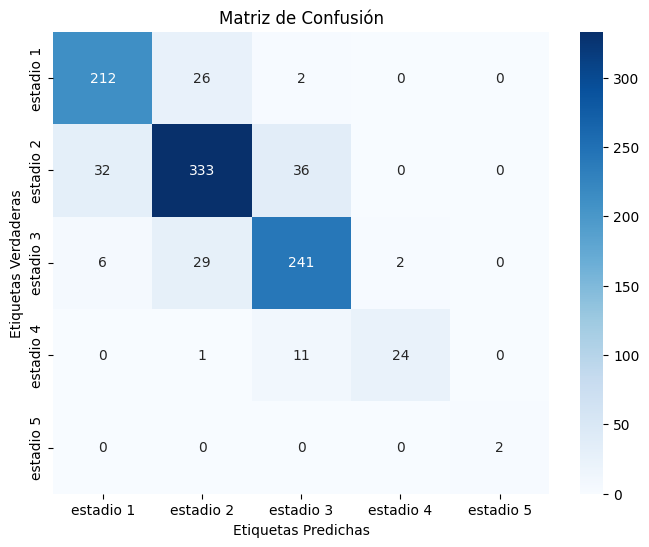

variance del Modelo: 0.17972831765935215
sesgo del Modelo: -0.018808777429467086


In [ ]:
# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del Modelo: %.2f%%" % (accuracy * 100.0))

# Definir un mapeo de renombre de clases
class_mapping = {
    0: 'estadio 1',
    1: 'estadio 2',
    2: 'estadio 3',
    3: 'estadio 4',
    4: 'estadio 5'
}

# Aplicar el renombre de clases a las etiquetas reales y predichas
y_test_mapped = [class_mapping[cl] for cl in y_test]
y_pred_mapped = [class_mapping[cl] for cl in y_pred]

# Mostrar el reporte de clasificación con las clases renombradas
print('Reporte de Clasificación:')
print(classification_report(y_test_mapped, y_pred_mapped))

# Calcular y mostrar la matriz de confusión con nombres de estadio
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()
import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)

**Catboost**

In [ ]:
# transformacion de las variables categóricas en valores numéricos
label_encoder = LabelEncoder()
df2['estadio'] = label_encoder.fit_transform(df2['estadio'])
df2['CREA '] = label_encoder.fit_transform(df2['CREA '])
df2['Sexo'] = label_encoder.fit_transform(df2['Sexo'])
df2['G_POB'] = label_encoder.fit_transform(df2['G_POB'])
df2['ETIO_ERC'] = label_encoder.fit_transform(df2['ETIO_ERC'])
df2['TA'] = label_encoder.fit_transform(df2['TA'])
df2['ANTAGONISTA'] = label_encoder.fit_transform(df2['ANTAGONISTA'])
df2['COLES'] = label_encoder.fit_transform(df2['COLES'])
df2['ALB/CREA'] = label_encoder.fit_transform(df2['ALB/CREA'])
df2['PROG_ERC'] = label_encoder.fit_transform(df2['PROG_ERC'])


<ipython-input-48-d6c9135a11f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['estadio'] = label_encoder.fit_transform(df2['estadio'])
<ipython-input-48-d6c9135a11f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CREA '] = label_encoder.fit_transform(df2['CREA '])
<ipython-input-48-d6c9135a11f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
#Se crea X contiene todas las columnas de df2 excepto la columna 'estadio', la cual es la variable objetivo. y contiene solo la columna 'estadio'.
X = df2.drop('estadio', axis=1).values
y = df2['estadio'].values

In [ ]:
# Se divide el Dataframe en datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('x_train and x_test shapes are {} and {}'.format(X_train.shape, X_test.shape))
print('y_train and y_test shapes are {} and {}'.format(y_train.shape, y_test.shape))

x_train and x_test shapes are (2232, 14) and (957, 14)
y_train and y_test shapes are (2232,) and (957,)


In [ ]:
pip install catboost

In [ ]:
from catboost import Pool, CatBoostClassifier

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   EDAD           3189 non-null   int64
 1   CREA           3189 non-null   int64
 2   IMC            3189 non-null   int64
 3   ETIO_ERC       3189 non-null   int64
 4   Sexo           3189 non-null   int64
 5   G_POB          3189 non-null   int64
 6   COLES          3189 non-null   int64
 7   TA             3189 non-null   int64
 8   DX_ERC         3189 non-null   int64
 9   ALB/CREA       3189 non-null   int64
 10  TIEMP_SERVI    3189 non-null   int64
 11  PROG_ERC       3189 non-null   int64
 12  ANTAGONISTA    3189 non-null   int64
 13  RECIBIO_TRANS  3189 non-null   int64
 14  estadio        3189 non-null   int64
dtypes: int64(15)
memory usage: 398.6 KB


In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train,
        cat_features=cat_features,
        eval_set=(X_val, y_val),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
)

Learning rate set to 0.5
0:	learn: 1.1942262	test: 1.2106234	best: 1.2106234 (0)	total: 52.2ms	remaining: 470ms
1:	learn: 1.0448357	test: 1.0492412	best: 1.0492412 (1)	total: 122ms	remaining: 489ms
2:	learn: 0.9533760	test: 0.9539530	best: 0.9539530 (2)	total: 180ms	remaining: 420ms
3:	learn: 0.8787887	test: 0.8702266	best: 0.8702266 (3)	total: 235ms	remaining: 353ms
4:	learn: 0.8363775	test: 0.8294075	best: 0.8294075 (4)	total: 287ms	remaining: 287ms
5:	learn: 0.8105814	test: 0.8055353	best: 0.8055353 (5)	total: 349ms	remaining: 233ms
6:	learn: 0.7793468	test: 0.7760493	best: 0.7760493 (6)	total: 411ms	remaining: 176ms
7:	learn: 0.7526280	test: 0.7539936	best: 0.7539936 (7)	total: 477ms	remaining: 119ms
8:	learn: 0.7321044	test: 0.7342841	best: 0.7342841 (8)	total: 573ms	remaining: 63.6ms
9:	learn: 0.7120391	test: 0.7226020	best: 0.7226020 (9)	total: 677ms	remaining: 0us

bestTest = 0.7226019927
bestIteration = 9



In [ ]:
from catboost import CatBoostClassifier, Pool

# Crear conjuntos de datos de CatBoost
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=cat_features)

val_dataset = Pool(data=X_val,
                   label=y_val,
                   cat_features=cat_features)

# Inicializar el modelo de CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')

# Ajustar el modelo con los datos de entrenamiento
model.fit(train_dataset, eval_set=val_dataset, early_stopping_rounds=10, verbose=100)



0:	learn: 1.1173544	test: 1.1250623	best: 1.1250623 (0)	total: 33.7ms	remaining: 304ms
9:	learn: 0.7975916	test: 0.7974690	best: 0.7974690 (9)	total: 264ms	remaining: 0us

bestTest = 0.7974689861
bestIteration = 9



In [ ]:
# Obtener predicciones para el conjunto de validación
preds_class = model.predict(val_dataset)
preds_proba = model.predict_proba(val_dataset)
preds_raw = model.predict(val_dataset, prediction_type='RawFormulaVal')


In [ ]:
pip install tabulate


Reporte de Clasificación:
              precision    recall  f1-score   support

   Estadio 1       0.70      0.69      0.69       161
   Estadio 2       0.69      0.66      0.67       265
   Estadio 3       0.66      0.70      0.68       184
   Estadio 4       0.45      0.52      0.48        27
   Estadio 5       0.00      0.00      0.00         1

    accuracy                           0.67       638
   macro avg       0.50      0.51      0.51       638
weighted avg       0.67      0.67      0.67       638



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


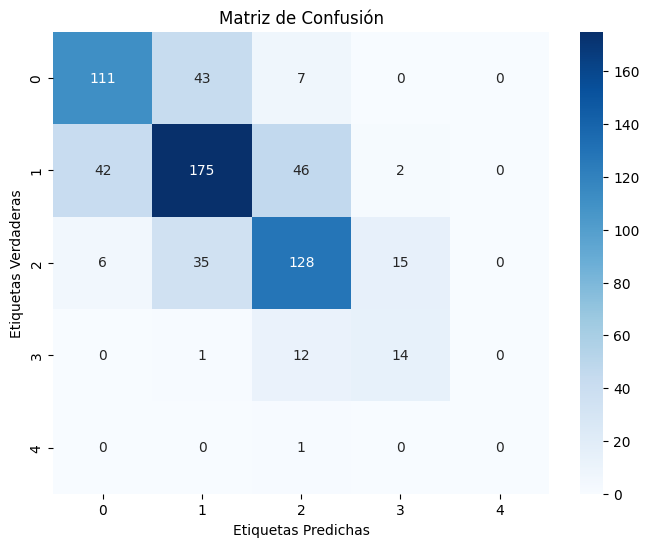

Precisión del Modelo: 0.670846394984326
variance del Modelo: 0.23719958202716823
sesgo del Modelo: -0.030303030303030304


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, preds_class)

# Mostrar reporte de clasificación (precision, recall, f1-score, support)
print("Reporte de Clasificación:")
class_report = classification_report(y_val, preds_class, target_names=['Estadio 1', 'Estadio 2', 'Estadio 3', 'Estadio 4','Estadio 5'])
print(class_report)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_val, preds_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar la precisión del modelo
print("Precisión del Modelo:", accuracy)

import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)

# **corn-ordinal-neuralnet**

In [ ]:
import pandas as pd
import numpy as np

df2= pd.read_csv('/content/ERC 2023_FINAL.csv',sep=";",encoding='latin-1')

df2 = df.dropna(subset=['TASA_FILTRACION'])

In [ ]:
import pandas as pd

def crear_columna_estadio(df2):
    """
    Crea una columna llamada "estadio" con los valores de la variable "TASAFILTRACION" clasificados en cuatro categorías.

    Args:
      df: Un DataFrame de pandas.

    Returns:
      El DataFrame original con una nueva columna llamada "estadio".
    """
    # Crear una función para asignar una categoría a cada valor de TASAFILTRACION
    def clasificar_estadio(TASA_FILTRACION):
        if TASA_FILTRACION >= 90:
            return "estadio 1"
        elif TASA_FILTRACION >= 60:
            return "estadio 2"
        elif TASA_FILTRACION >= 30:
            return "estadio 3"
        elif TASA_FILTRACION >= 15:
            return "estadio 4"
        else:
            return "estadio 5"

    # Agregar la columna
    df["estadio"] = df["TASA_FILTRACION"].apply(clasificar_estadio)

    return df

In [ ]:
data = crear_columna_estadio(df2)

In [ ]:
df2

,TIPO_REG,DAT_BARN,EDAD,Sexo,AFILIACION,COD_EPS,COD_ETNICA,G_POB,MUN.,DATE_,...,COST_TRANS,TIEMP_SERVI,COST_TOTAL,COD EPS,NOV_REPORAMTE,CAU_MUERTE,DAT_MUERTE,CUI,DAT_CORTE,estadio
0,HTA,30/08/1949,74,M,P,RES003,Ninguna,Adulto Mayor,50001,2/05/1988,...,NaN,12,794113.0,NaN,NaN,NaN,NaN,57959,30/06/2023,estadio 2
1,HTA,21/09/1935,88,M,P,RES003,Ninguna,Adulto Mayor,50001,1/07/1979,...,NaN,12,NaN,NaN,7.0,NaN,NaN,507499,30/06/2023,estadio 3
2,HTA-DIAB,20/12/1934,89,M,P,RES003,Ninguna,Adulto Mayor,50001,1/05/1990,...,NaN,10,2304515.0,NaN,NaN,NaN,NaN,175624,30/06/2023,estadio 3
3,HTA,13/08/1936,87,M,P,RES003,Ninguna,Adulto Mayor,50001,16/06/1961,...,NaN,12,1336759.0,NaN,NaN,NaN,NaN,399569,30/06/2023,estadio 3
4,HTA,20/05/1939,84,M,P,RES003,Ninguna,Adulto Mayor,50001,1/03/1960,...,NaN,8,1336759.0,NaN,NaN,NaN,NaN,403006,30/06/2023,estadio 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,HTA,30/11/1968,55,M,P,RES003,Ninguna,Trabajador Urbano,11001,1/04/2012,...,NaN,12,794113.0,NaN,NaN,NaN,NaN,3634652,30/06/2023,estadio 2
4746,HTA,30/01/1969,54,M,P,RES003,Ninguna,Otro,11001,31/08/2011,...,NaN,12,1336759.0,NaN,NaN,NaN,NaN,399824,30/06/2023,estadio 3
4747,NO HTA/DIAB CON DAÑO REL,18/11/1961,62,M,P,RES003,Ninguna,Otro,11001,1/11/2018,...,NaN,12,250000.0,NaN,NaN,NaN,NaN,2863534,30/06/2023,estadio 3
4748,NO HTA/DIAB CON DAÑO REL,24/07/1963,60,M,P,RES003,Ninguna,Otro,11001,1/07/2024,...,NaN,12,250000.0,NaN,NaN,NaN,NaN,317487,30/06/2023,estadio 2


In [ ]:
# transformacion de las variables categóricas en valores numéricos
label_encoder = LabelEncoder()
df2['estadio'] = label_encoder.fit_transform(df2['estadio'])
#df2['CREA '] = label_encoder.fit_transform(df2['CREA '])
df2['Sexo'] = label_encoder.fit_transform(df2['Sexo'])
df2['G_POB'] = label_encoder.fit_transform(df2['G_POB'])
df2['ETIO_ERC'] = label_encoder.fit_transform(df2['ETIO_ERC'])
#df2['TA'] = label_encoder.fit_transform(df2['TA'])
df2['ANTAGONISTA'] = label_encoder.fit_transform(df2['ANTAGONISTA'])
#df2['COLES'] = label_encoder.fit_transform(df2['COLES'])
#df2['ALB/CREA'] = label_encoder.fit_transform(df2['ALB/CREA'])
df2['PROG_ERC'] = label_encoder.fit_transform(df2['PROG_ERC'])

In [ ]:
df2.fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Columns: 115 entries, TIPO_REG to estadio
dtypes: float64(75), int64(11), object(29)
memory usage: 2.8+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df2['estadio'] = label_encoder.fit_transform(df2['estadio'])

data_labels = df2["estadio"]
data_features = df2.loc[:, ['EDAD',
  'CREA ',
  'IMC',
  'ETIO_ERC',
  'Sexo',
  'G_POB',
  'COLES',
  'TA',
  'DX_ERC',
  'ALB/CREA',
  'TIEMP_SERVI',
  'PROG_ERC',
  'ANTAGONISTA',
  'RECIBIO_TRANS']]

df2.head

<bound method NDFrame.head of                       TIPO_REG    DAT_BARN  EDAD  Sexo AFILIACION COD_EPS  \
0                          HTA  30/08/1949    74     1          P  RES003   
1                          HTA  21/09/1935    88     1          P  RES003   
2                     HTA-DIAB  20/12/1934    89     1          P  RES003   
3                          HTA  13/08/1936    87     1          P  RES003   
4                          HTA  20/05/1939    84     1          P  RES003   
...                        ...         ...   ...   ...        ...     ...   
4745                       HTA  30/11/1968    55     1          P  RES003   
4746                       HTA  30/01/1969    54     1          P  RES003   
4747  NO HTA/DIAB CON DAÑO REL  18/11/1961    62     1          P  RES003   
4748  NO HTA/DIAB CON DAÑO REL  24/07/1963    60     1          P  RES003   
4926                      DIAB  11/07/1997    26     1          P  RES003   

     COD_ETNICA  G_POB  MUN.        DATE_  ..

In [ ]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 4926
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAD           3189 non-null   int64  
 1   CREA           3189 non-null   float64
 2   IMC            3189 non-null   int64  
 3   ETIO_ERC       3189 non-null   int64  
 4   Sexo           3189 non-null   int64  
 5   G_POB          3189 non-null   int64  
 6   COLES          3189 non-null   float64
 7   TA             3189 non-null   float64
 8   DX_ERC         3189 non-null   int64  
 9   ALB/CREA       3189 non-null   float64
 10  TIEMP_SERVI    3189 non-null   int64  
 11  PROG_ERC       3189 non-null   int64  
 12  ANTAGONISTA    3189 non-null   int64  
 13  RECIBIO_TRANS  3189 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 373.7 KB


In [ ]:
print('Number of features:', data_features.shape[1])
print('Number of examples:', data_features.shape[0])
print('Labels:', np.unique(data_labels.values))
print('Label distribution:', np.bincount(data_labels))

Number of features: 14
Number of examples: 3189
Labels: [0 1 2 3 4]
Label distribution: [ 793 1270  984  122   20]


In [ ]:
avg_prediction = np.median(data_labels.values)  # median minimizes MAE
baseline_mae = np.mean(np.abs(data_labels.values - avg_prediction))
print(f'Baseline MAE: {baseline_mae:.2f}')

Baseline MAE: 0.65


In [ ]:
from torch.utils.data import Dataset


class MyDataset(Dataset):

    def __init__(self, feature_array, label_array, dtype=np.float32):
        self.features = feature_array.astype(dtype)
        self.labels = label_array

    def __getitem__(self, index):
        inputs = self.features[index]
        label = self.labels[index]
        return inputs, label

    def __len__(self):
        return self.features.shape[0]

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    data_features.values,
    data_labels.values,
    test_size=0.2,
    random_state=1,
    stratify=data_labels.values)

In [ ]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
import torch


##########################
### SETTINGS
##########################

# Hyperparameters
random_seed = 1
learning_rate = 0.001
num_epochs = 100
batch_size = 128

# Architecture
NUM_CLASSES = 5

from torch.utils.data import Dataset

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Training on', DEVICE)

class MyDataset(Dataset):

    def __init__(self, feature_array, label_array, dtype=np.float32):

        self.features = feature_array.astype(np.float32)
        self.labels = label_array

    def __getitem__(self, index):
        inputs = self.features[index]
        label = self.labels[index]
        return inputs, label

    def __len__(self):
        return self.labels.shape[0]
import torch
from torch.utils.data import DataLoader


# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = MyDataset(X_train_std, y_train)
test_dataset = MyDataset(X_test_std, y_test)


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True, # want to shuffle the dataset
                          num_workers=0) # number processes/CPUs to use

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False,
                         num_workers=0)
# Checking the dataset
for inputs, labels in train_loader:
    print('Input batch dimensions:', inputs.shape)
    print('Input label dimensions:', labels.shape)
    break


Training on cpu
Input batch dimensions: torch.Size([128, 14])
Input label dimensions: torch.Size([128])


In [ ]:
class MLP(torch.nn.Module):

    def __init__(self, in_features, num_classes, num_hidden_1=300, num_hidden_2=300,num_hidden_3=300):
        super().__init__()

        self.my_network = torch.nn.Sequential(

            # 1st hidden layer
            torch.nn.Linear(in_features, num_hidden_1, bias=False),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.BatchNorm1d(num_hidden_1),

            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2, bias=False),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.BatchNorm1d(num_hidden_2),

                        # 3nd hidden layer
            torch.nn.Linear(num_hidden_2, num_hidden_3, bias=False),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.BatchNorm1d(num_hidden_3),

            ### Specify CORN layer
            torch.nn.Linear(num_hidden_3, (num_classes))
            ###--------------------------------------------------------------------###
        )

    def forward(self, x):
        logits = self.my_network(x)
        return logits



torch.manual_seed(random_seed)
model = MLP(in_features=14, num_classes=NUM_CLASSES)
model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
pip install coral_pytorch

In [ ]:
import coral_pytorch

In [ ]:
from coral_pytorch.losses import corn_loss


for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, class_labels) in enumerate(train_loader):

        class_labels = class_labels.to(DEVICE)
        features = features.to(DEVICE)
        logits = model(features)

        #### CORN loss
        loss = corn_loss(logits, class_labels, NUM_CLASSES)
        ###--------------------------------------------------------------------###

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### LOGGING
        if not batch_idx % 200:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f'
                   %(epoch+1, num_epochs, batch_idx,
                     len(train_loader), loss))

Epoch: 001/100 | Batch 000/020 | Cost: 0.7095
Epoch: 002/100 | Batch 000/020 | Cost: 0.4382
Epoch: 003/100 | Batch 000/020 | Cost: 0.3910
Epoch: 004/100 | Batch 000/020 | Cost: 0.3337
Epoch: 005/100 | Batch 000/020 | Cost: 0.2874
Epoch: 006/100 | Batch 000/020 | Cost: 0.3196
Epoch: 007/100 | Batch 000/020 | Cost: 0.2692
Epoch: 008/100 | Batch 000/020 | Cost: 0.2316
Epoch: 009/100 | Batch 000/020 | Cost: 0.2480
Epoch: 010/100 | Batch 000/020 | Cost: 0.1898
Epoch: 011/100 | Batch 000/020 | Cost: 0.2563
Epoch: 012/100 | Batch 000/020 | Cost: 0.2637
Epoch: 013/100 | Batch 000/020 | Cost: 0.1934
Epoch: 014/100 | Batch 000/020 | Cost: 0.1935
Epoch: 015/100 | Batch 000/020 | Cost: 0.2347
Epoch: 016/100 | Batch 000/020 | Cost: 0.2093
Epoch: 017/100 | Batch 000/020 | Cost: 0.2026
Epoch: 018/100 | Batch 000/020 | Cost: 0.2306
Epoch: 019/100 | Batch 000/020 | Cost: 0.1813
Epoch: 020/100 | Batch 000/020 | Cost: 0.1705
Epoch: 021/100 | Batch 000/020 | Cost: 0.2111
Epoch: 022/100 | Batch 000/020 | C

In [ ]:
from coral_pytorch.dataset import corn_label_from_logits


def compute_mae_and_mse(model, data_loader, device):

    with torch.no_grad():

        mae, mse, acc, num_examples = 0., 0., 0., 0

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            predicted_labels = corn_label_from_logits(logits).float()

            num_examples += targets.size(0)
            mae += torch.sum(torch.abs(predicted_labels - targets))
            mse += torch.sum((predicted_labels - targets)**2)

        mae = mae / num_examples
        mse = mse / num_examples
        return mae, mse
train_mae, train_mse = compute_mae_and_mse(model, train_loader, DEVICE)
test_mae, test_mse = compute_mae_and_mse(model, test_loader, DEVICE)
print(f'Mean absolute error (train/test): {train_mae:.2f} | {test_mae:.2f}')
print(f'Mean squared error (train/test): {train_mse:.2f} | {test_mse:.2f}')

Mean absolute error (train/test): 0.09 | 0.26
Mean squared error (train/test): 0.09 | 0.29


In [ ]:
def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        acc, num_examples = 0., 0

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            predicted_labels = corn_label_from_logits(logits).float()

            num_examples += targets.size(0)
            acc += torch.sum(predicted_labels == targets)

        acc = acc / num_examples

        return acc


In [ ]:
train_acc = compute_accuracy(model, train_loader, DEVICE)
test_acc = compute_accuracy(model, test_loader, DEVICE)


In [ ]:
print(f'Accuracy (train/test): {train_acc:.2f} | {test_acc:.2f}')


Accuracy (train/test): 0.91 | 0.75


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

def compute_metrics(model, data_loader, device):
    with torch.no_grad():
        all_targets = []
        all_predictions = []

        for i, (features, targets) in enumerate(data_loader):
            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            predicted_labels = corn_label_from_logits(logits).float()

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted_labels.cpu().numpy())

        # Convertir las listas en arrays de NumPy
        all_targets = np.array(all_targets)
        all_predictions = np.array(all_predictions)

        # Filtrar las instancias correspondientes a 'Estadio 5'
        mask = all_targets != 5  # 4 corresponds to 'Estadio 5'
        filtered_targets = all_targets[mask]
        filtered_predictions = all_predictions[mask]

        # Definir los nombres de las clases excluyendo 'Estadio 5'
        class_names = ['Estadio 1', 'Estadio 2', 'Estadio 3', 'Estadio 4','Estadio 5']

        # Calcular el reporte de clasificación con los nombres de las clases
        report = classification_report(filtered_targets, filtered_predictions, target_names=class_names, labels=[0, 1, 2, 3, 4])

        # Imprimir el reporte de métricas
        print("Reporte de Métricas en el Conjunto de Prueba:")
        print(report)

        # Calcular y mostrar la matriz de confusión
        cm = confusion_matrix(filtered_targets, filtered_predictions, labels=[0, 1, 2, 3, 4])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.title("Matriz de Confusión")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

# Obtener el reporte de métricas en el conjunto de prueba y mostrar la matriz de confusión
compute_metrics(model, test_loader, DEVICE)



import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)


ValueError: ignored

**Redes Neuronales Feedforward**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import LabelEncoder

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)  # You can adjust the number of epochs and batch size as needed


Epoch 1/50
70/70 [==============================] - 3s 6ms/step - loss: 2.5776 - accuracy: 0.3490
Epoch 2/50
70/70 [==============================] - 0s 7ms/step - loss: 1.3717 - accuracy: 0.3934
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 1.2682 - accuracy: 0.4225
Epoch 4/50
70/70 [==============================] - 0s 5ms/step - loss: 1.1792 - accuracy: 0.4525
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 1.1882 - accuracy: 0.4830
Epoch 6/50
70/70 [==============================] - 0s 4ms/step - loss: 1.1087 - accuracy: 0.5112
Epoch 7/50
70/70 [==============================] - 1s 9ms/step - loss: 1.0848 - accuracy: 0.4978
Epoch 8/50
70/70 [==============================] - 1s 8ms/step - loss: 1.0629 - accuracy: 0.5206
Epoch 9/50
70/70 [==============================] - 0s 4ms/step - loss: 1.0220 - accuracy: 0.5314
Epoch 10/50
70/70 [==============================] - 0s 2ms/step - loss: 1.0182 - accuracy: 0.5466
Epoch 11/50
70/70 [

Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.8761 - accuracy: 0.6287
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.6482
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.6557
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.6466
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8406 - accuracy: 0.6419
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.8073 - accuracy: 0.6485
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.8130 - accuracy: 0.6548
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 0.8170 - accuracy: 0.6541
Epoch 9/50
100/100 [==============================] - 0s 4ms/step - loss: 0.8077 - accuracy: 0.6626
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - loss: 0.8199 - accuracy: 0.6488

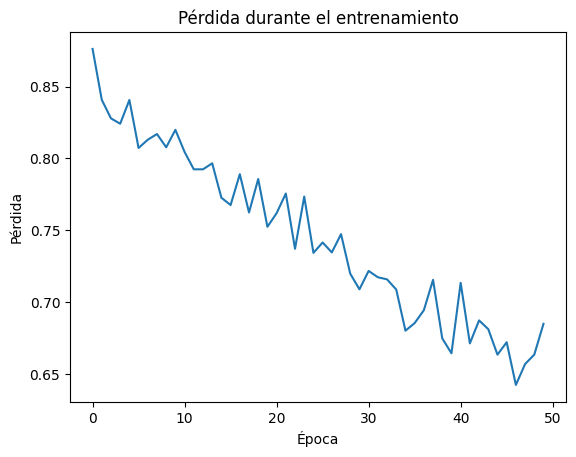

In [ ]:
history = model.fit(X, y, epochs=50, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X, y)
print(f'Pérdida: {loss:.4f}')
print(f'Precisión: {accuracy*100:.2f}%')

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

30/30 [==============================] - 0s 1ms/step
Precisión del Modelo: 73.67%
Reporte de Clasificación:
              precision    recall  f1-score   support

   Estadio 1       0.74      0.82      0.78       240
   Estadio 2       0.69      0.80      0.74       401
   Estadio 3       0.83      0.60      0.70       278
   Estadio 4       1.00      0.44      0.62        36
   Estadio 5       1.00      0.50      0.67         2

    accuracy                           0.74       957
   macro avg       0.85      0.64      0.70       957
weighted avg       0.75      0.74      0.73       957



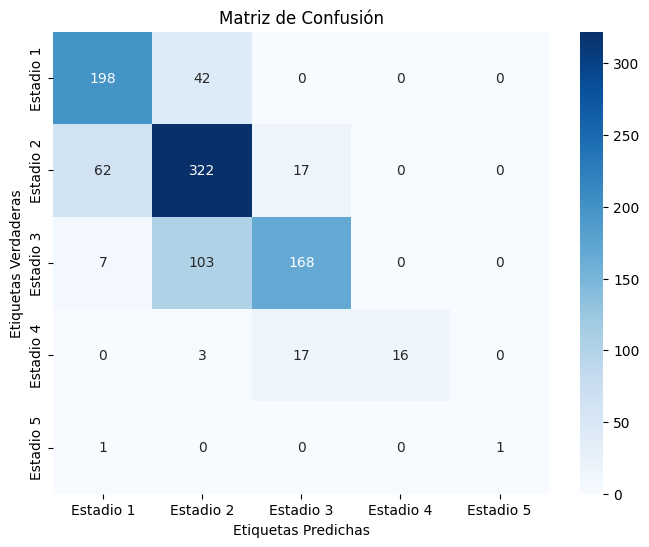

variance del Modelo: 0.49320794148380354
sesgo del Modelo: 0.08150470219435736


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener predicciones del conjunto de prueba
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)


# Asegúrate de que y_test tenga la misma longitud que y_pred
y_test_subset = y_test[:len(y_pred)]
# Definir un mapeo de renombre de clases
class_mapping = {
    0: 'Estadio 1',
    1: 'Estadio 2',
    2: 'Estadio 3',
    3: 'Estadio 4',
    4: 'Estadio 5'
}

# Aplicar el renombre de clases a las etiquetas reales y predichas
y_test_mapped = [class_mapping[cl] for cl in y_test]
y_pred_mapped = [class_mapping[cl] for cl in y_pred_labels]

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test_mapped, y_pred_mapped)
print("Precisión del Modelo: %.2f%%" % (accuracy * 100.0))

# Mostrar el reporte de clasificación con nombres de clases personalizados
print('Reporte de Clasificación:')
print(classification_report(y_test_mapped, y_pred_mapped))

# Calcular y mostrar la matriz de confusión con nombres de clases personalizados
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)


**Maquinas de soporte vectorial (SVM)**

In [ ]:
#Se utiliza la clase 'SVC' se usan para problemas de clasificacion se emplea el método fit,
#se entrena ajustado a los datos de entrenamiento, esto  implica que el modelo ajusta
#los parámetros para aprender la relación entre las características de entrada (X) y las etiquetas de salida (y) en el conjunto de entrenamiento.
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
model.predict(X_train)

array([1, 1, 1, ..., 2, 2, 1])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Estadio1','Estadio2','Estadio3','Estadio4','Estadio5'],
                     columns = [['Estadio1','Estadio2','Estadio3','Estadio4','Estadio5']])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reporte de Clasificación:
               precision    recall  f1-score   support

   Estadio 1       0.76      0.44      0.55       553
   Estadio 2       0.53      0.72      0.61       869
   Estadio 3       0.61      0.63      0.62       706
   Estadio 4       1.00      0.03      0.07        86
   Estadio 5       0.00      0.00      0.00        18

    accuracy                           0.59      2232
   macro avg       0.58      0.36      0.37      2232
weighted avg       0.62      0.59      0.57      2232



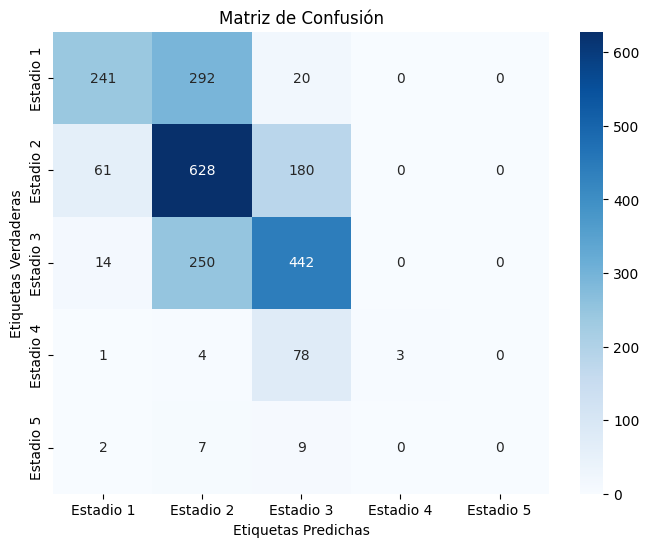

Precisión del Modelo: 0.5887096774193549
variance del Modelo: 0.49320794148380354
sesgo del Modelo: 0.08150470219435736


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener predicciones para el conjunto de entrenamiento
preds = model.predict(X_train)

# Definir un mapeo de renombre de clases
class_mapping = {
    0: 'Estadio 1',
    1: 'Estadio 2',
    2: 'Estadio 3',
    3: 'Estadio 4',
    4: 'Estadio 5'
}

# Aplicar el renombre de clases a las etiquetas reales y predichas
y_train_mapped = [class_mapping[cl] for cl in y_train]
preds_mapped = [class_mapping[cl] for cl in preds]

# Calcular la precisión del modelo
accuracy = accuracy_score(y_train_mapped, preds_mapped)

# Mostrar reporte de clasificación (precision, recall, f1-score, support) con nombres de clases personalizados
print("Reporte de Clasificación:\n", classification_report(y_train_mapped, preds_mapped))

# Calcular y mostrar la matriz de confusión con nombres de clases personalizados
conf_matrix = confusion_matrix(y_train_mapped, preds_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar la precisión del modelo
print("Precisión del Modelo:", accuracy)

import numpy as np
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones del modelo en el conjunto de validación
residuals = y_test - y_pred
variance = np.mean(residuals**2)
print("variance del Modelo:", variance)


bias = np.mean(y_pred - y_test)
print("sesgo del Modelo:", bias)